# STR-SNP Universal
1) Checking the format, as an internal control.

2) Converting the data form fast5 to fastq format. 

3) Plotting the read length and extracting additional information.

4) Identifying the different barcodes and direct the subsequent reads to the corresponding fastq file. Using a fuzzy regex allows to compensate for sequencing errors. 

5) Constructing a plot for each individual Barcodes

## 1) Checking current fast5 format

In [4]:
# Checking current fast5 format
import h5py

# Example f5 file
f5 = h5py.File('/home/senne/nanopore/Multiplex/Nanopore_data/Test/FW01C250_20170109_FN_MN15671_sequencing_run_sample_id_61417_ch100_read1818_strand.fast5')

# Walk the file structure
def printname(name):
  print(name,'(group)' if type(f5[name]) == h5py._hl.group.Group else '')

f5.visit(printname)

Analyses (group)
Analyses/Basecall_1D_000 (group)
Analyses/Basecall_1D_000/BaseCalled_template (group)
Analyses/Basecall_1D_000/BaseCalled_template/Fastq 
Analyses/Basecall_1D_000/Summary (group)
Analyses/Basecall_1D_000/Summary/basecall_1d_template (group)
Analyses/Basecall_1D_001 (group)
Analyses/Basecall_1D_001/BaseCalled_complement (group)
Analyses/Basecall_1D_001/BaseCalled_complement/Events 
Analyses/Basecall_1D_001/BaseCalled_complement/Fastq 
Analyses/Basecall_1D_001/BaseCalled_template (group)
Analyses/Basecall_1D_001/BaseCalled_template/Events 
Analyses/Basecall_1D_001/BaseCalled_template/Fastq 
Analyses/Basecall_1D_001/Configuration (group)
Analyses/Basecall_1D_001/Configuration/aggregator (group)
Analyses/Basecall_1D_001/Configuration/basecall_1d (group)
Analyses/Basecall_1D_001/Configuration/basecall_2d (group)
Analyses/Basecall_1D_001/Configuration/calibration_strand (group)
Analyses/Basecall_1D_001/Configuration/components (group)
Analyses/Basecall_1D_001/Configuration/e

In [ ]:
#Remove counter to enhance speed!

from h5py import File as h5file
import glob

infiles          = glob.glob('/media/genomics/senne/Nanopore_Multiplex_20170110/pass/*.fast5')
outfile_name     = '/home/senne/nanopore/Multiplex/Nanopore_data/pass.fastq'
withoutFQcounter = 0
fast5FileCount   = 0

with open(outfile_name, 'wt') as outfile:
  out_write = outfile.write
  progress = 0.
  total = len(infiles)
  for f5file_name in infiles:
    progress += 1
    #print("Progress: " + str(progress / total))
    with h5file(f5file_name) as f5_file:
      fast5FileCount += 1
      try:
        fq = f5_file['Analyses/Basecall_2D_000/BaseCalled_2D/Fastq']
        out_write(fq.value.decode())
      except KeyError:
        withoutFQcounter += 1 

print('{}/{} fast5 files without called fastq sequence'.format(withoutFQcounter, fast5FileCount))

Progress: 4.740212645939297e-06
Progress: 9.480425291878594e-06
Progress: 1.4220637937817891e-05
Progress: 1.8960850583757187e-05
Progress: 2.3701063229696485e-05
Progress: 2.8441275875635783e-05
Progress: 3.318148852157508e-05
Progress: 3.7921701167514375e-05
Progress: 4.266191381345367e-05
Progress: 4.740212645939297e-05
Progress: 5.2142339105332264e-05
Progress: 5.6882551751271565e-05
Progress: 6.162276439721085e-05
Progress: 6.636297704315016e-05
Progress: 7.110318968908946e-05
Progress: 7.584340233502875e-05
Progress: 8.058361498096804e-05
Progress: 8.532382762690734e-05
Progress: 9.006404027284665e-05
Progress: 9.480425291878594e-05
Progress: 9.954446556472523e-05
Progress: 0.00010428467821066453
Progress: 0.00010902489085660382
Progress: 0.00011376510350254313
Progress: 0.00011850531614848243
Progress: 0.0001232455287944217
Progress: 0.00012798574144036101
Progress: 0.00013272595408630032
Progress: 0.0001374661667322396
Progress: 0.0001422063793781789
Progress: 0.000146946592024

## 2) Extract Fastq from Fast5 using method (SW)

In [19]:
# Extract fastq sequences out of the fast5 containers generated by the Nanopore basecalling application
# 

from h5py import File as h5file
import h5py,glob

infiles          = glob.glob('/media/genomics/senne/Nanopore_Multiplex_20170110/pass/*.fast5')
outfile          = '/home/senne/nanopore/Multiplex/Nanopore_data/pass.fastq'
outfile          = open(outfile, 'wt')
withoutFQcounter = 0
fast5FileCount   = 0

out_write = outfile.write

for f5file in infiles:
  f5 = h5file(f5file)
  fast5FileCount += 1
  try:
    fq = f5['Analyses/Basecall_2D_000/BaseCalled_2D/Fastq']
    out_write(fq.value.decode())
  except KeyError:
    withoutFQcounter += 1 
  f5.close()
outfile.close()

print('{}/{} fast5 files without called fastq sequence'.format(withoutFQcounter, fast5FileCount))

0/210950 fast5 files without called fastq sequence


In [22]:
%%bash 
cd /home/senne/nanopore/Multiplex/Nanopore_data/

cat pass.fastq pass_pass.fastq > Multiplex.fastq 

## 3) Plot read lenght for all reads & extraction additional information

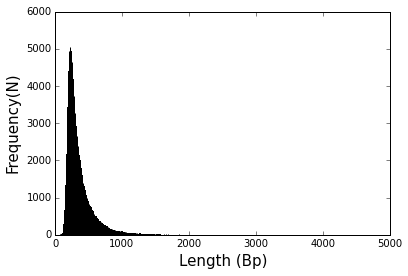

In [23]:
# Plot read length distribution

%matplotlib inline

from itertools import count
import matplotlib.pyplot as plt

with open('/home/senne/nanopore/Multiplex/Nanopore_data/Multiplex.fastq') as fastq:
  c     = count(0)
  reads = [line for line in fastq if next(c)%4 == 1]

# Plot length histogram
plt.hist([len(r) for r in reads], bins=1000)
plt.xlabel("Length (Bp)",size=15)
plt.ylabel("Frequency(N)", size=15)
axes = plt.gca()
axes.set_xlim([0,5000])
plt.show()

In [24]:
fastq_file_name= '/home/senne/nanopore/Multiplex/Nanopore_data/Multiplex.fastq'

hist_array = []
hist_arrayG = []
hist_arrayA = []
hist_arrayC = []
hist_arrayT = []
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'G'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayG.append(read_length)
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'A'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayA.append(read_length) 
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'C'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayC.append(read_length) 
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'T'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayT.append(read_length)

hist_array.extend(hist_arrayA)
hist_array.extend(hist_arrayC)
hist_array.extend(hist_arrayG)
hist_array.extend(hist_arrayT)

import numpy as np

len (hist_array), np.mean(hist_array), np.median(hist_array) , max(hist_array), np.std(hist_array)

(216934, 351.61168834760804, 287.0, 4898, 209.89565258758702)

## 4) Identifying the barcodes and write into different fastq files
-Load barcodes

-Load sequence data

-Using fuzzy regex to identify the barcodes and write to output

###  4a) Load barcode sequences

In [25]:
# Load barcode sequences (comma separated: BarcodeName,forward_barcode_seq)
# Reverse compliment has to be added to in code later on

BCFile = '/home/senne/nanopore/Multiplex/barcodes.csv'
BCdata = {}

with open(BCFile) as f:
  for l in f:
    l = l.strip()
    
    # Ignore the column header line (should start with a '#')
    if l.startswith('#'):
      continue
    
    BCname, fBCseq = l.split(',')
    BCdata[BCname] = {'f': fBCseq}
    print ('BCname {}: {}'.format(BCname, BCdata[BCname]))
    
print('Loaded sequences for {} barcodes'.format(len(BCdata)))




BCname NB01: {'f': 'AAGAAAGTTGTCGGTGTCTTTGTG'}
BCname NB02: {'f': 'TCGATTCCGTTTGTAGTCGTCTGT'}
BCname NB03: {'f': 'GAGTCTTGTGTCCCAGTTACCAGG'}
BCname NB04: {'f': 'TTCGGATTCTATCGTGTTTCCCTA'}
BCname NB05: {'f': 'CTTGTCCAGGGTTTGTGTAACCTT'}
BCname NB06: {'f': 'TTCTCGCAAAGGCAGAAAGTAGTC'}
BCname NB07: {'f': 'GTGTTACCGTGGGAATGAATCCTT'}
BCname NB08: {'f': 'TTCAGGGAACAAACCAAGTTACGT'}
BCname NB09: {'f': 'AACTAGGCACAGCGAGTCTTGGTT'}
BCname NB10: {'f': 'AAGCGTTGAAACCTTTGTCCTCTC'}
BCname NB11: {'f': 'GTTTCATCTATCGGAGGGAATGGA'}
BCname NB12: {'f': 'CAGGTAGAAAGAAGCAGAATCGGA'}
Loaded sequences for 12 barcodes


### 4b) Load sequencing data (ligated reads)

In [26]:
# Load sequencing data (ligated alleles)
# Parsing through the 

readFile = '/home/senne/nanopore/Multiplex/Nanopore_data/Multiplex.fastq'
readData = {}

with open(readFile) as f:
  cnt = 0

  for l in f:
    cnt += 1
    if cnt % 4 == 1:
      seqName = l.strip()
    elif cnt % 4 == 2:
      seqData = l.strip()
      readData[seqName] = seqData
    else:
      continue
            
print('Loaded {} sequences'.format(len(readData)))

Loaded 216664 sequences


### 4c) Regex om de barcodes te isoleren (met een aantal fouten toegelaten)

In [17]:
# Utility functions
#

def reverseComplement(seq):
  transTab = str.maketrans('agctyrwskmdvhbAGCTYRWSKMDVHB', 'tcgarywsmkhbdvTCGARYWSMKHBDV')
  return seq.translate(transTab)[::-1]
print('done')

done


In [27]:
import regex

maxMisMatch    = 3
fBarcodeSeq    = {}
fBarcodeSeqRc  = {}
outputFasta    = {}
foundBC        = {}
foundSense     = 0
foundAntiSense = 0

# Output files
for BCname in sorted(BCdata):
    foundBC[BCname]       = 0
    fBarcodeSeq[BCname]   = regex.compile('(?e)({}){{e<={}}}'.format(BCdata[BCname]['f'], maxMisMatch))
    fBarcodeSeqRc[BCname] = regex.compile('(?e)({}){{e<={}}}'.format(reverseComplement(BCdata[BCname]['f']), maxMisMatch))
    
    # Create output fasta
    outputFasta[BCname] = open('/home/senne/nanopore/Multiplex/results/barcode_{}.fasta'.format(BCname), 'wt')
    
    
for seq in readData:
    for BCname in fBarcodeSeq:
        for match in fBarcodeSeq[BCname].finditer(readData[seq]):
            outputFasta[BCname].write('>{}\n'.format(seq))
            outputFasta[BCname].write('{}\n'.format(readData[seq]))
            foundBC[BCname] += 1
            foundSense += 1
            break
            
        else:
            # Test the reverse complement
            for match in fBarcodeSeqRc[BCname].finditer(readData[seq]):
                outputFasta[BCname].write('>{}\n'.format(seq))
                outputFasta[BCname].write('{}\n'.format(readData[seq]))
                foundBC[BCname] += 1
                foundAntiSense += 1
                break
        

for BCname in sorted(BCdata):
    outputFasta[BCname].close()
    print('{}: {} reads'.format(BCname, foundBC[BCname]))

print('Found {} sense and {} antisense barcodes'.format(foundSense, foundAntiSense))

NB01: 32220 reads
NB02: 24105 reads
NB03: 28808 reads
NB04: 13507 reads
NB05: 0 reads
NB06: 0 reads
NB07: 21875 reads
NB08: 9851 reads
NB09: 0 reads
NB10: 0 reads
NB11: 0 reads
NB12: 0 reads
Found 90612 sense and 39754 antisense barcodes


## 5) Constructing a plot for each individual Barcodes
Zowel de STR als SNP data

In [2]:
fastq_file_name= '/home/senne/nanopore/Multiplex/results/barcode_{}.fasta''
#{}aan te passen

#SNP and STR data are present in this fasta file
hist_array = []
hist_arrayG = []
hist_arrayA = []
hist_arrayC = []
hist_arrayT = []
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'G'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayG.append(read_length)
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'A'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayA.append(read_length) 
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'C'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayC.append(read_length) 
with open(fastq_file_name, "rb") as infile:
    for line in infile:
        if line.startswith(b'T'):
            read_length = len(line[:-1]) #Last char is \n
            #histogram_data[read_length] += 1
            hist_arrayT.append(read_length)

hist_array.extend(hist_arrayA)
hist_array.extend(hist_arrayC)
hist_array.extend(hist_arrayG)
hist_array.extend(hist_arrayT)

import numpy as np

len (hist_array), np.mean(hist_array), np.median(hist_array) , max(hist_array), np.std(hist_array)

SyntaxError: EOL while scanning string literal (<ipython-input-2-3ae4fd79218a>, line 1)